## Problematique

#### Comment prédire de manière fiable la réussite à l'examen du bac Mauritanien en 2023 en utilisant les données du Bac 2022 , et comment utiliser ces préductions pour améliorer l'accompagnement éducatif des élèves ?

#### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("train_set.csv")
test_data = pd.read_csv("test_set.csv", sep = ';')

In [3]:
train_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note3,Note4,Note5,Note6,Note7,Note8,Willaya,moughataa,DateNaissance,ID
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,5.00,5.500,3.00,7.75,7.50,18.5,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,10.75,2.000,8.75,2.00,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,26 ديسمبر 1991,ID_36311
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,6.50,7.625,1.00,5.50,10.00,17.0,Inchiri,AKJOUJT,8 مايو 1995,ID_21059
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,5.50,5.500,5.00,1.50,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,24 avr. 1999,ID_24532
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,3.50,4.000,4.00,2.00,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,10 mai 2001,ID_17861


In [4]:
df1=train_data.iloc[:,[2,3,8,9]]
categorical_cols = df1.select_dtypes(include='object').columns


In [5]:
for i in categorical_cols:
    print(df1[i].unique())

['SN' 'LO' 'LM' 'M' 'TM']
['SN09' 'LO1' 'LM3' 'SN06' 'SN03' 'LM4' 'M02' 'SN12' 'SN07' 'SN04' 'LM2'
 'LO2' 'SN02' 'LO3' 'SN11' 'SN10' 'SN01' 'M01' 'SN05' 'SN08' 'LO4' 'LM1'
 'LM6' 'LM5']
['Ajourné' 'Admis' 'Sessionnaire' 'Abscent'
 'Examen annulé à cause du Téléphone'
 'Examen annulé à cause du comportement']


In [6]:
train_data.columns

Index(['Unnamed: 0', 'Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance',
       'Centre', 'Etablissement', 'moyeneGeneral', 'Decision', 'Note1',
       'Note2', 'Note3', 'Note4', 'Note5', 'Note6', 'Note7', 'Note8',
       'Willaya', 'moughataa', 'DateNaissance', 'ID'],
      dtype='object')

In [7]:
train_data['Decision'].value_counts()

Ajourné                                  18966
Admis                                     1973
Sessionnaire                              1530
Abscent                                   1068
Examen annulé à cause du Téléphone         351
Examen annulé à cause du comportement        6
Name: Decision, dtype: int64

Comme on veut expliquer la variable décision qui est notre variable cible par l'âge et des autres variables catégorielles, donc on va convertir la variable "DateNaissance" en datetime, puis on va calculer l'âge en se basant sur l'année du baccalauréat.

In [8]:
import re
from datetime import datetime

# definir les noms des mois en arabe et en francais
arabic_months = ['يناير', 'فبراير', 'مارس', 'أبريل', 'مايو', 'يونيو', 'يوليو', 'أغسطس', 'سبتمبر', 'أكتوبر', 'نوفمبر', 'ديسمبر']
french_months = ['janv.', 'fév.', 'mars', 'avr.', 'mai', 'juin', 'juil.', 'août', 'sep.', 'oct.', 'nov.', 'déc.']


#  une expression réguliére pour extraire le jour, le mois et l'année séparément
arabic_regex = r'(\d{1,2})\s+(' + '|'.join(arabic_months) + r')\s+(\d{4})'
french_regex = r'(\d{1,2})\s+(' + '|'.join(french_months) + r')\s+(\d{4})'

# appliquer l'expression réguliére et créer un objet datetime
def convert_date(date_string):
    if re.search(arabic_regex, date_string):
        return datetime.strptime(re.search(arabic_regex, date_string).group(1)+' '+str(arabic_months.index(re.search(arabic_regex, date_string).group(2))+1)+' '+re.search(arabic_regex, date_string).group(3), '%d %m %Y')
    elif re.search(french_regex, date_string):
        return datetime.strptime(re.search(french_regex, date_string).group(1)+' '+str(french_months.index(re.search(french_regex, date_string).group(2))+1)+' '+re.search(french_regex, date_string).group(3), '%d %m %Y')
    else:
        return None

train_data['DateNaissance'] = train_data['DateNaissance'].apply(convert_date)
test_data['DateNaissance'] = test_data['DateNaissance'].apply(convert_date)

# convertir le format  datetime au format "YYYY-MM-DD" 
train_data['DateNaissance'] = train_data['DateNaissance'].dt.strftime('%Y-%m-%d')
test_data['DateNaissance'] = test_data['DateNaissance'].dt.strftime('%Y-%m-%d')


In [9]:
from datetime import datetime

today = datetime.today()
today_2021 = today.replace(year=2021)
today_2022 = today.replace(year=2022)

# ajouter une nouvelle colonne avec la date d'aujourd'hui mais avec l'année 2021/2022 
train_data['Today2021'] = today_2021.strftime('%Y-%m-%d')
test_data['Today2022'] = today_2022.strftime('%Y-%m-%d')


# covertir la colonne 'DateNaissance' au format datetime
train_data['DateNaissance'] = pd.to_datetime(train_data['DateNaissance'])
test_data['DateNaissance'] = pd.to_datetime(test_data['DateNaissance'])


# calculer l'age de chaque etudiant
train_data['Age'] = (today_2021 - train_data['DateNaissance']) // pd.Timedelta(days=365.25)
test_data['Age'] = (today_2022 - test_data['DateNaissance']) // pd.Timedelta(days=365.25)

In [10]:
train_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note5,Note6,Note7,Note8,Willaya,moughataa,DateNaissance,ID,Today2021,Age
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,3.00,7.75,7.50,18.5,Nouakchott 2 (Ouest),KSAR,1998-12-12,ID_27634,2021-11-25,22.0
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,8.75,2.00,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,1991-12-26,ID_36311,2021-11-25,29.0
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,1.00,5.50,10.00,17.0,Inchiri,AKJOUJT,1995-05-08,ID_21059,2021-11-25,26.0
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,5.00,1.50,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,1999-04-24,ID_24532,2021-11-25,22.0
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,4.00,2.00,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,2001-05-10,ID_17861,2021-11-25,20.0


#### Ajouter un colonne sexe prédit à partir des noms en utilisant le classifieur Naïve Bayes

In [11]:
names_mr=pd.read_csv("names-mr.csv",sep=";")
names_dataset=pd.read_csv("names_dataset.csv")

names_mr.rename(columns={'NOMPL': "fullname", 'SEXE': "sex"}, inplace=True)
names_mr['name'] = names_mr['fullname'].str.split(' ', n=1, expand=True)[0]
names_mr.drop(['fullname'], axis=1, inplace=True)
names_mr = names_mr.reindex(columns=['name','sex'])
names_mr

,name,sex
0,Fatimetou,F
1,Mariem,F
2,Aicha,F
3,Nanna,F
4,Vatme,F
...,...,...
67877,Maroufa,M
67878,Muhammed,M
67879,Alieu,M
67880,Abdou,M


In [12]:
names_dataset.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


In [13]:
names=pd.concat([names_mr,names_dataset])

In [14]:
names.head()

,name,sex,index
0,Fatimetou,F,NaN
1,Mariem,F,NaN
2,Aicha,F,NaN
3,Nanna,F,NaN
4,Vatme,F,NaN


In [15]:
names['sex'].replace(['F','M'],[0,1],inplace=True)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [17]:
Xfeatures = names['name']
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [18]:
from sklearn.model_selection import train_test_split
y = names.sex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7607852284725121

In [20]:
train_data['prenom'] = train_data['Nom'].str.split(' ', n=1, expand=True)[0]
train_data['prenom'].head(5)
vect=train_data['prenom']

In [21]:
test_data['prenom'] = test_data['Nom'].str.split(' ', n=1, expand=True)[0]
test_data['prenom'].head(5)
vect=test_data['prenom']

In [22]:
vec1=vect.to_numpy()

In [23]:
vec1=vec1.tolist()

In [24]:
l=[]
for i in train_data['prenom']:
    I=[]
    I.append(i)
    names=I
    vect = cv.transform(names).toarray()
    m=clf.predict(vect)[0]
    l.append(m)

In [25]:
Y=[]
for i in test_data['prenom']:
    I=[]
    I.append(i)
    names=I
    vect = cv.transform(names).toarray()
    m=clf.predict(vect)[0]
    Y.append(m)

In [26]:
for i in range(len(l)):
    if l[i]==0:
        l[i]='F'
    else :
        l[i]='M'

In [27]:
for i in range(len(Y)):
    if Y[i]==0:
        Y[i]='F'
    else :
        Y[i]='M'

In [28]:
train_data['sexe']=l
test_data['sexe']=Y

In [29]:
train_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note7,Note8,Willaya,moughataa,DateNaissance,ID,Today2021,Age,prenom,sexe
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,7.50,18.5,Nouakchott 2 (Ouest),KSAR,1998-12-12,ID_27634,2021-11-25,22.0,El,M
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,1991-12-26,ID_36311,2021-11-25,29.0,Mariem,F
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,10.00,17.0,Inchiri,AKJOUJT,1995-05-08,ID_21059,2021-11-25,26.0,Aiche,F
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,1999-04-24,ID_24532,2021-11-25,22.0,Ahmed,M
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,2001-05-10,ID_17861,2021-11-25,20.0,Mariam,F


<Figure size 800x600 with 0 Axes>

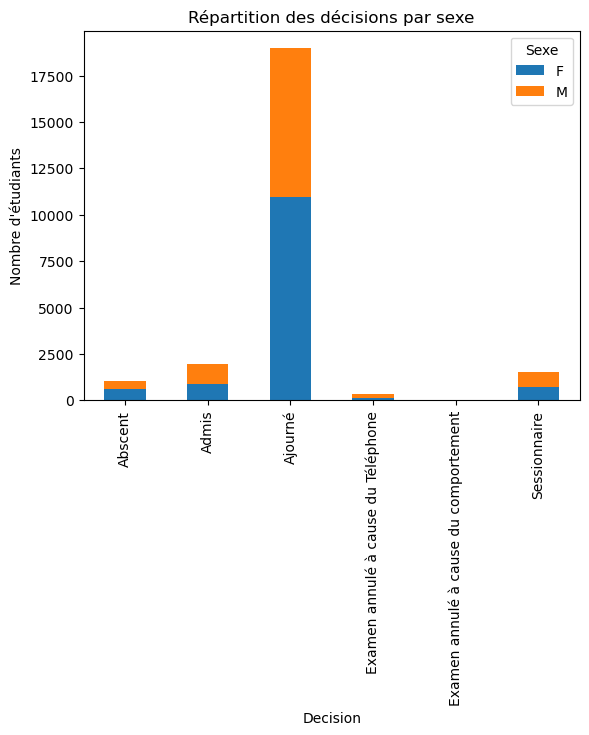

In [30]:
import matplotlib.pyplot as plt

# Créer un graphique en barres pour visualiser la répartition des résultats par sexe
plt.figure(figsize=(8, 6))
train_data.groupby('Decision')['sexe'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Decision')
plt.ylabel('Nombre d\'étudiants')
plt.title('Répartition des décisions par sexe')
plt.legend(title='Sexe', loc='upper right')
plt.show()

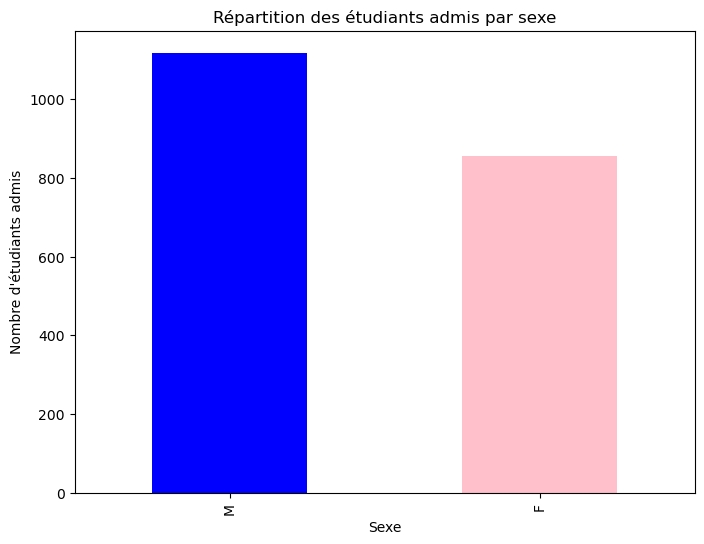

In [32]:
colors = {'M': 'blue', 'F': 'pink'}

plt.figure(figsize=(8, 6))
admitted_data = train_data[train_data['Decision'] == 'Admis']
gender_counts = admitted_data['sexe'].value_counts()
gender_counts.plot(kind='bar', color=[colors.get(gender, 'gray') for gender in gender_counts.index])

plt.xlabel('Sexe')
plt.ylabel('Nombre d\'étudiants admis')
plt.title('Répartition des étudiants admis par sexe')
plt.show()

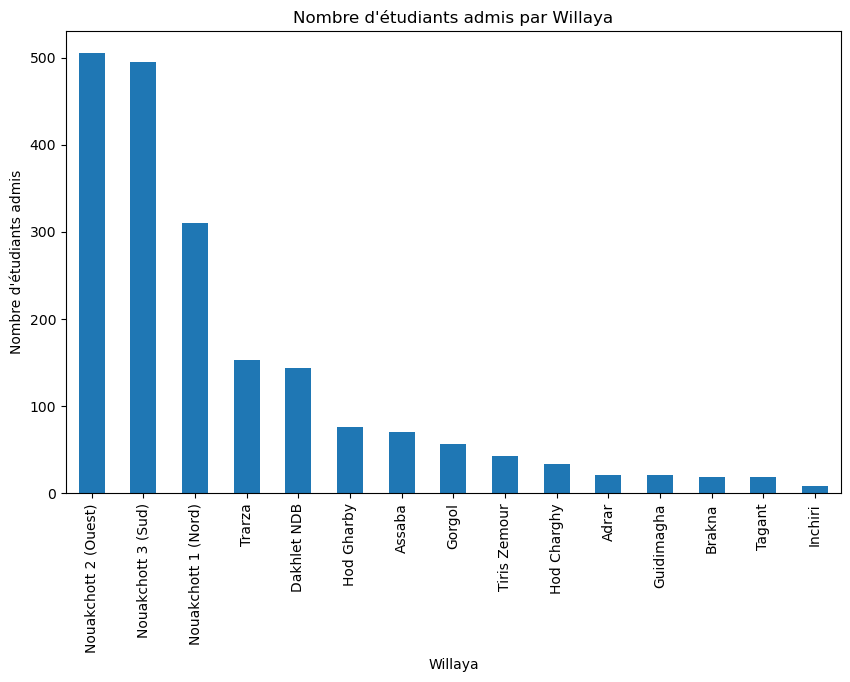

In [33]:
admitted_data = train_data[train_data['Decision'] == 'Admis']

# Créer un graphique en barres pour le nombre d'étudiants admis par Willaya
plt.figure(figsize=(10, 6))
institution_counts = admitted_data['Willaya'].value_counts()
institution_counts.plot(kind='bar')
plt.xlabel('Willaya')
plt.ylabel('Nombre d\'étudiants admis')
plt.title('Nombre d\'étudiants admis par Willaya')
plt.show()

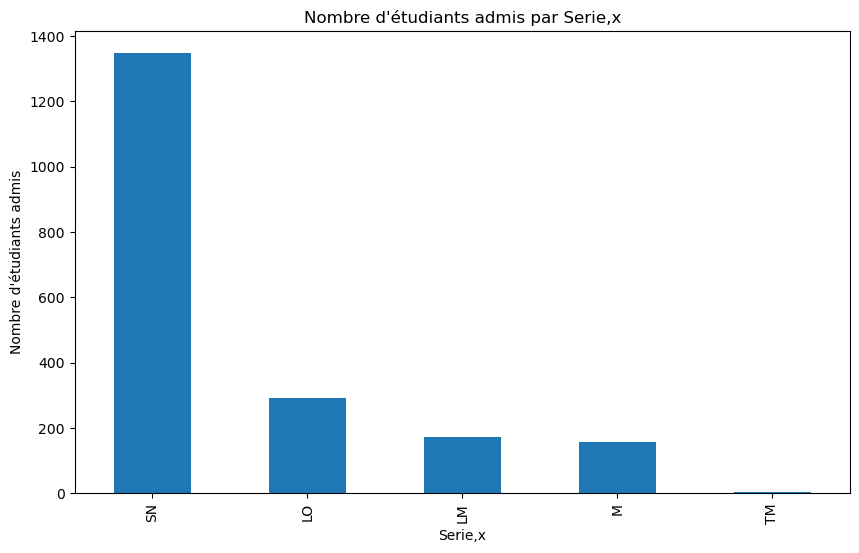

In [34]:


# Créer un graphique en barres pour le nombre d'étudiants admis par Serie,x
plt.figure(figsize=(10, 6))
institution_counts = admitted_data['Serie,x'].value_counts()
institution_counts.plot(kind='bar')
plt.xlabel('Serie,x')
plt.ylabel('Nombre d\'étudiants admis')
plt.title('Nombre d\'étudiants admis par Serie,x')
plt.show()

In [35]:
train_data.to_csv("data1.csv", index=False)

In [1]:
import pandas as pd

# Exemple de données à écrire dans le fichier CSV
data = {
    'Nom': ['El Alye Cheikh Ahmed Maihmatt', 'Aichata Sid\'Ahmed Ahmed Ely', 'Zahra Sid Ahmed Ahmed Leely Jamaa'],
    'Serie,x': ['SN', 'SN', 'SN'],
    'GroupeAnonymat': ['SN09', 'SN09', 'SN09'],
    'LieuNaissance': ['Vassala', 'El Megve', 'Vassala'],
    'Centre': ['Lycée Vassala', 'Lycée Vassala', 'Lycée Vassala'],
    'Etablissement': ['Lycée Vassala', 'Lycée Vassala', 'Lycée Vassala'],
    'Willaya': ['Hod Charghy', 'Hod Charghy', 'Hod Charghy'],
    'moughataa': ['BASSEKNOU', 'BASSEKNOU', 'BASSEKNOU'],
    'DateNaissance': ['18-sept-99', '31-mai-95', '28-juin-03'],
    'ID': ['ID_18', 'ID_20', 'ID_22'],
    'prediction': ['pred_1', 'pred_2', 'pred_3']
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv('test_data.csv', index=False)

print("Fichier CSV créé avec succès.")


Fichier CSV créé avec succès.
